In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos los archivos csv con los datos

In [36]:
events = pd.read_csv('events.csv.gzip', compression = 'gzip', low_memory = False)

In [3]:
installs = pd.read_csv('installs.csv.gzip', compression = 'gzip')

In [8]:
clicks = pd.read_csv('clicks.csv.gzip', compression = 'gzip')

#### Chequeamos que las columnas de interés no contengan valores nulos

In [9]:
events.isnull().any()

date                  False
event_id              False
ref_type              False
ref_hash              False
application_id        False
attributed            False
device_countrycode    False
device_os_version      True
device_brand           True
device_model           True
device_city            True
session_user_agent     True
trans_id               True
user_agent             True
event_uuid             True
carrier                True
kind                   True
device_os              True
wifi                   True
connection_type        True
ip_address            False
device_language        True
dtype: bool

In [10]:
installs.isnull().any()

created               False
application_id        False
ref_type              False
ref_hash              False
click_hash             True
attributed            False
implicit              False
device_countrycode    False
device_brand           True
device_model           True
session_user_agent     True
user_agent             True
event_uuid             True
kind                   True
wifi                   True
trans_id               True
ip_address            False
device_language        True
dtype: bool


#### Buscamos los devices que se encuentran tanto en el dataset con información sobre los clicks como en el de información sobre los installs

In [11]:
installed_clicks = pd.merge(clicks, installs, on='ref_hash', how='inner')

In [12]:
len(installed_clicks)

11

#### Dado que este número es muy bajo no nos permite realizar un correcto análisis 

#### Buscamos entonces los devices que se encuentren tanto en el dataset de eventos así como en el dataset de instalaciones

In [13]:
merged = pd.merge(events, installs, on='ref_hash', how='inner')

In [14]:
len(merged)

53157

In [15]:
merged.head()

,date,event_id,ref_type_x,ref_hash,application_id_x,attributed_x,device_countrycode_x,device_os_version,device_brand_x,device_model_x,...,device_brand_y,device_model_y,session_user_agent_y,user_agent_y,event_uuid_y,kind_y,wifi_y,trans_id_y,ip_address_y,device_language_y
0,2019-03-10 18:28:09.696,1,1494519392962156891,5007008548832677915,43,False,6333597102633388268,4.353750e+18,NaN,1.267677e+18,...,NaN,2.331947e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,NaN,NaN,True,NaN,6447840378868652213,4.621024e+18
1,2019-03-10 18:28:30.550,33,1494519392962156891,5007008548832677915,43,False,6333597102633388268,4.353750e+18,NaN,1.267677e+18,...,NaN,2.331947e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,NaN,NaN,True,NaN,6447840378868652213,4.621024e+18
2,2019-03-11 15:39:41.486,1,1494519392962156891,5007008548832677915,43,False,6333597102633388268,4.353750e+18,NaN,1.267677e+18,...,NaN,2.331947e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,NaN,NaN,True,NaN,6447840378868652213,4.621024e+18
3,2019-03-11 15:40:36.377,33,1494519392962156891,5007008548832677915,43,False,6333597102633388268,4.353750e+18,NaN,1.267677e+18,...,NaN,2.331947e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,NaN,NaN,True,NaN,6447840378868652213,4.621024e+18
4,2019-03-11 15:39:20.750,33,1494519392962156891,5007008548832677915,43,False,6333597102633388268,4.353750e+18,NaN,1.267677e+18,...,NaN,2.331947e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,NaN,NaN,True,NaN,6447840378868652213,4.621024e+18


#### Queremos ver cuáles son los eventos con más ocurrencias en este subset de usuarios, que también tienen una instalación

In [16]:
top_10_events = merged['event_id'].value_counts().sort_values(ascending = False).head(10)

In [17]:
top_10_events

22     17696
31      5756
80      3120
138     3039
81      2464
1       2385
171     2272
513     1726
82      1634
89      1097
Name: event_id, dtype: int64

In [18]:
top_10_events.sum()/len(merged['event_id'])

0.7748556163816619

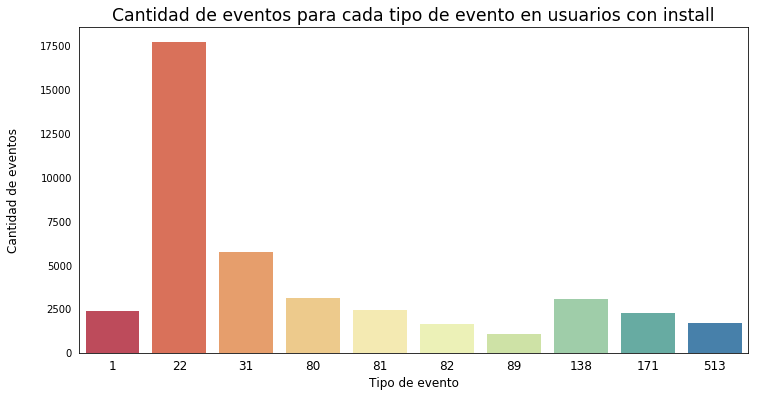

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_events.index, y = top_10_events.values, palette = sns.color_palette("Spectral", 10))

plt.xticks(rotation = 0, fontsize = 'large')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos para cada tipo de evento en usuarios con install', fontsize = 'xx-large')
plt.xlabel('Tipo de evento', fontsize = 'large')
plt.show();

#### Algunos de los códigos de eventos concuerdan con los eventos mayoritarios del caso general, pero otros aparecen únicamente en este subset de usuarios

#### Por otro lado, también queremos comparar los eventos con mayor cantidad de atribuciones a Jampp

In [20]:
merged['attributed_x'].value_counts()

False    53048
True       109
Name: attributed_x, dtype: int64

In [21]:
most_attr_events = merged.groupby(merged['event_id']).attributed_x.sum()
most_attr_events = most_attr_events.sort_values(ascending = False).head(10)
most_attr_events

event_id
513    87.0
239     8.0
31      7.0
238     4.0
153     2.0
518     1.0
105     0.0
117     0.0
125     0.0
101     0.0
Name: attributed_x, dtype: float64

In [22]:
filtered_by_most_attr = merged[merged['event_id'].isin(most_attr_events.index)]

In [23]:
most_attr_perc = most_attr_events/filtered_by_most_attr['event_id'].value_counts()*100
most_attr_perc

31      0.121612
101     0.000000
105     0.000000
117     0.000000
125     0.000000
153     0.735294
238    21.052632
239    34.782609
513     5.040556
518    25.000000
dtype: float64

#### Vemos que el número de atribuciones a Jampp es pequeño dentro de este subset de usuarios, con una gran diferencia entre el evento con más ocurrencias y el que le sigue, siendo ésta de un orden de magnitud. 
#### Tomaremos al evento de código 513 como el evento de mayor atribución a Jampp y descartaremos el resto, ya que sus cantidades son demasiado pequeñas y podríamos caer en errores de pequeño tamano muestral.

#### Si miramos el caso general, el evento 513 era también el evento con mayor porcentaje de atribuciones a Jampp. Dado que se encuentra como el más atribuido podemos concluir que es un evento importante, pero debido a su presencia en ambos grupos no podemos relacionarlo directamente con los installs.

#### Si bien este evento es frecuente entre los usuarios que instalaron, nos gustaría tener una idea de la temporalidad de los eventos. Queremos identificar los eventos que ocurren próximos a un evento de instalación.

In [24]:
#Timestamp en que fue creado el evento
merged['event_timestamp'] = pd.to_datetime(merged.date)

#Timestamp en que fue creado el evento de instalación
merged['install_timestamp'] = pd.to_datetime(merged.created)

#Calculamos la diferencia entre un evento y un evento de instalación, en segundos
merged['install_delta'] = (merged['event_timestamp'] - merged['install_timestamp']).dt.total_seconds()

#### Queremos ver cómo es la distribución de los eventos alrededor del evento de instalación

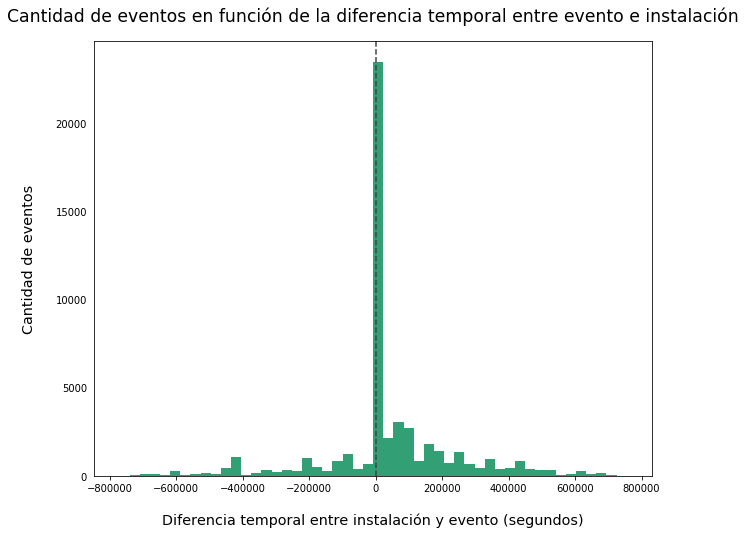

In [25]:
plt.figure(figsize=(10, 8))
plt.hist(merged['install_delta'], bins = 50, color = '#008751', alpha = 0.8)

plt.tick_params(top = False, bottom = True, left = False, right = False, labelleft = True, labelbottom = True)
plt.axvline(0, color='#40434E', linewidth=1.5, linestyle='dashed')
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'x-large')
plt.xlabel('Diferencia temporal entre instalación y evento (segundos)', labelpad = 20, fontsize = 'x-large')
plt.title('Cantidad de eventos en función de la diferencia temporal entre evento e instalación', fontsize = 'xx-large', pad = 20)
plt.show()

#### Vemos que hay ocurrencia de eventos pre y post-instalación. La mayor cantidad de ocurrencias sucede muy cercana a la instalación.

#### Nos interesa saber cuáles son esos eventos

In [26]:
#Los eventos previos a la instalación son aquellos con un delta temporal negativo
merged['pre_install'] = merged['install_delta'] < 0

In [27]:
events_pre_install = merged[merged['pre_install'] == True]
events_pre_install = events_pre_install['event_id'].value_counts().head(10)
events_pre_install

22     2389
138    2273
33      755
171     525
31      503
98      456
161     388
1       383
273     371
513     334
Name: event_id, dtype: int64

In [28]:
events_post_install = merged[merged['pre_install'] == False]
events_post_install = events_post_install['event_id'].value_counts().head(10)
events_post_install

22     15307
31      5253
80      2938
81      2361
1       2002
171     1747
82      1571
513     1392
89      1068
138      766
Name: event_id, dtype: int64

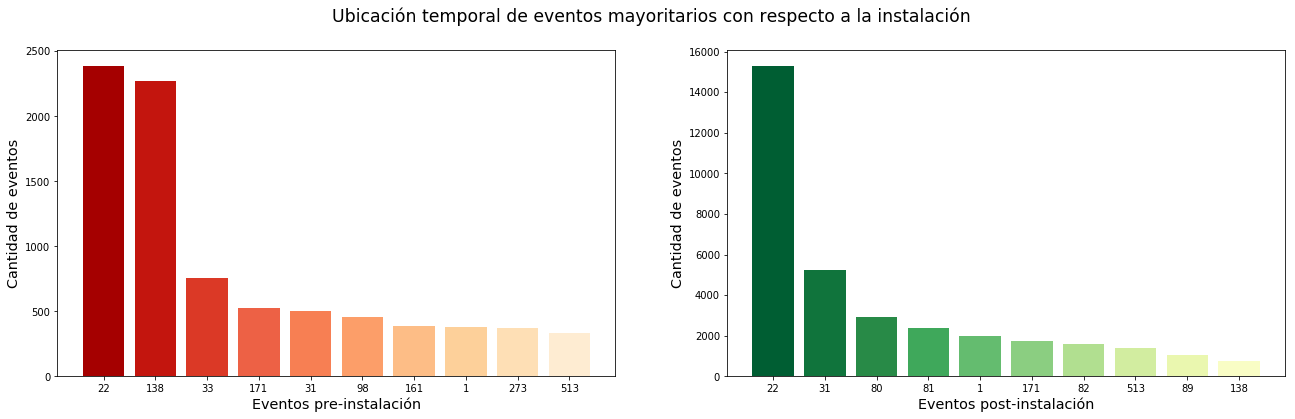

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 6))
plt.subplots_adjust(hspace = 0.4)

ax1.bar(range(10), events_pre_install.values, color = sns.color_palette('OrRd_r', 10))
ax1.set_xticks(range(10))
ax1.set_xticklabels(events_pre_install.index)
ax1.set_xlabel('Eventos pre-instalación', fontsize = 'x-large')
ax1.set_ylabel('Cantidad de eventos', fontsize = 'x-large')

ax2.bar(range(10), events_post_install.values, color = sns.color_palette('YlGn_r', 10))
ax2.set_xticks(range(10))
ax2.set_xticklabels(events_post_install.index)
ax2.set_xlabel('Eventos post-instalación', fontsize = 'x-large')
ax2.set_ylabel('Cantidad de eventos', fontsize = 'x-large')

fig.suptitle('Ubicación temporal de eventos mayoritarios con respecto a la instalación', fontsize = 'xx-large');
plt.show();

#### Vemos que existen eventos que se encuentran en ambos períodos, mientras que otros pertenecen únicamente a uno

In [30]:
pre = set(events_pre_install.index)
post = set(events_post_install.index)

In [31]:
in_both = pre.union(post)
only_pre = pre.difference(post)
only_post = post.difference(pre)

#### Eventos que ocurren pre y post instalación:

In [32]:
in_both

{1, 22, 31, 33, 80, 81, 82, 89, 98, 138, 161, 171, 273, 513}

#### Eventos que ocurren mayoritariamente pre-instalación:

In [33]:
only_pre

{33, 98, 161, 273}

#### Eventos que ocurren mayoritariamente post-instalación:

In [34]:
only_post

{80, 81, 82, 89}

#### Dado que los eventos post-instalación no nos sirven para predecir una instalación, nos centraremos en los eventos previos. Queremos conocer la distribución de estos eventos, para poder ver si alguno se encuentra ligado temporalmente con el evento de instalación

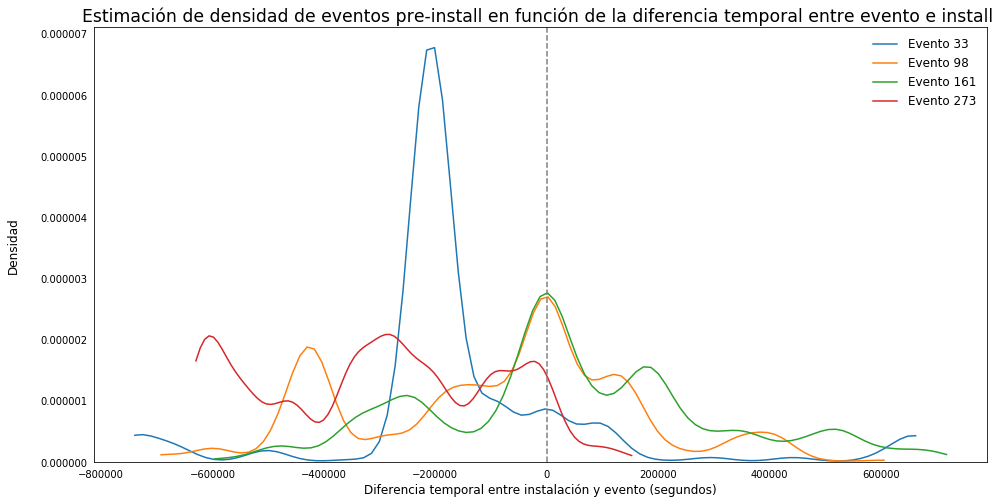

In [35]:
event_33 = merged[merged['event_id'] == 33]['install_delta']
event_98 = merged[merged['event_id'] == 98]['install_delta']
event_161 = merged[merged['event_id'] == 161]['install_delta']
event_273 = merged[merged['event_id'] == 273]['install_delta']

plt.figure(figsize=(16, 8))
plt_params ={'hist':False, 'kde_kws': {'bw': 0.15}, 'norm_hist': False}
sns.distplot(event_33, label = "Evento 33", **plt_params)
sns.distplot(event_98, label = "Evento 98", **plt_params)
sns.distplot(event_161, label = "Evento 161", **plt_params)
sns.distplot(event_273, label = "Evento 273", **plt_params)
plt.axvline(0, linestyle = '--', color = 'grey')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Densidad', labelpad = 20, fontsize = 'large')
plt.title('Estimación de densidad de eventos pre-install en función de la diferencia temporal entre evento e install ', fontsize = 'xx-large')
plt.xlabel('Diferencia temporal entre instalación y evento (segundos)', fontsize = 'large')
plt.legend(frameon = False, loc = 1, handletextpad = 0.9, fontsize = 'large')
plt.show();

#### Podemos observar que antes de la instalación (tiempo = 0, marcado con una línea punteada) se observa un pico muy notorio del evento 33, seguido tiempo después de un notorio y progresivo aumento de los eventos 98 y 161.
#### La presencia de este patrón de eventos en un usuario, podría ser útil para predecir una instalación. Dado que el evento 33 se encuentra más alejado temporalmente del evento de instalación, probablemente los eventos más significativos sean el 161 y 98, que se encuentran mucho más cercanos temporalmente y alcanzan su máximo en el momento de la instalación.
#### Cabe destacar que, a menos que sean mutuamente excluyentes, la presencia de dos eventos distintos que presentan un máximo de ocurrencias muy cercano al evento de instalación favorece aun más la detección de las posibles instalaciones.